https://saralgyaan.com/posts/python-candlestick-chart-matplotlib-tutorial-chapter-11/


In [16]:
# !pip install yfinance
# !pip install mpl_finance

In [17]:
import pandas as pd
import numpy as np
import yfinance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 7]

plt.rc('font', size=14) 

In [18]:
name = 'BTC-USD'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1d",start="2023-03-15",end="2023-07-15")



In [19]:
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)

df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]

In [20]:
df

,Date,Open,High,Low,Close
Date,,,,,
2023-03-15 00:00:00+00:00,738594.0,24770.925781,25240.615234,23964.910156,24375.960938
2023-03-16 00:00:00+00:00,738595.0,24373.457031,25190.326172,24225.111328,25052.789062
2023-03-17 00:00:00+00:00,738596.0,25055.123047,27787.812500,24955.169922,27423.929688
2023-03-18 00:00:00+00:00,738597.0,27448.117188,27725.953125,26636.261719,26965.878906
2023-03-19 00:00:00+00:00,738598.0,26969.503906,28440.560547,26907.716797,28038.675781
...,...,...,...,...,...
2023-07-10 00:00:00+00:00,738711.0,30172.423828,31026.083984,29985.394531,30414.470703
2023-07-11 00:00:00+00:00,738712.0,30417.632812,30788.314453,30358.097656,30620.951172
2023-07-12 00:00:00+00:00,738713.0,30622.246094,30959.964844,30228.835938,30391.646484


In [21]:
def isSupport(df,i):
  support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] \
  and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]

  return support

def isResistance(df,i):
  resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] \
  and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2] 

  return resistance

In [22]:
levels = []
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    levels.append((i,df['Low'][i]))
  elif isResistance(df,i):
    levels.append((i,df['High'][i]))


In [23]:
def plot_all():
  fig, ax = plt.subplots()

  candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)

  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()

  fig.tight_layout()

  for level in levels:
    plt.hlines(level[1],xmin=df['Date'][level[0]],\
               xmax=max(df['Date']),colors='blue')
  fig.show()

C:\Users\clementich\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


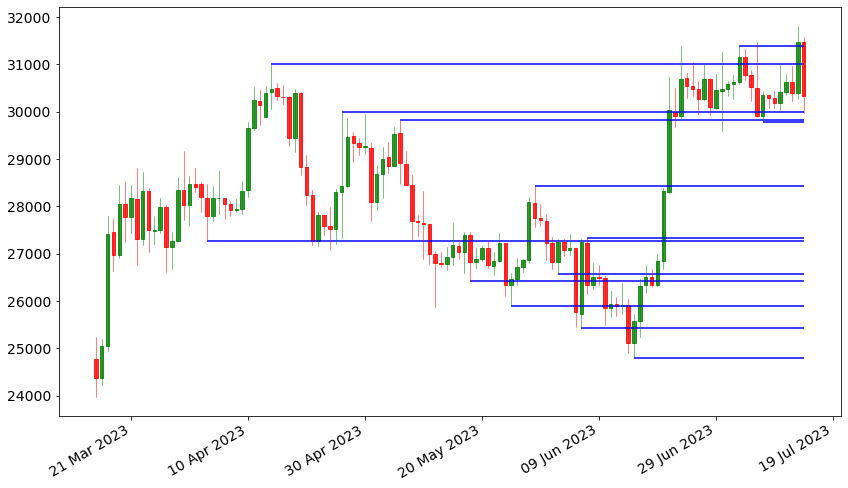

In [24]:
plot_all()

In [25]:
s =  np.mean(df['High'] - df['Low'])

In [26]:
def isFarFromLevel(l):
  return np.sum([abs(l-x) < s  for x in levels]) == 0

In [27]:
levels = []
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    l = df['Low'][i]

    if isFarFromLevel(l):
      levels.append((i,l))

  elif isResistance(df,i):
    l = df['High'][i]

    if isFarFromLevel(l):
      levels.append((i,l))
    

In [28]:
levels

[(19, 27276.720703125),
 (30, 31005.607421875),
 (42, 29995.837890625),
 (71, 25890.59375),
 (75, 28432.0390625),
 (92, 24797.16796875)]

C:\Users\clementich\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


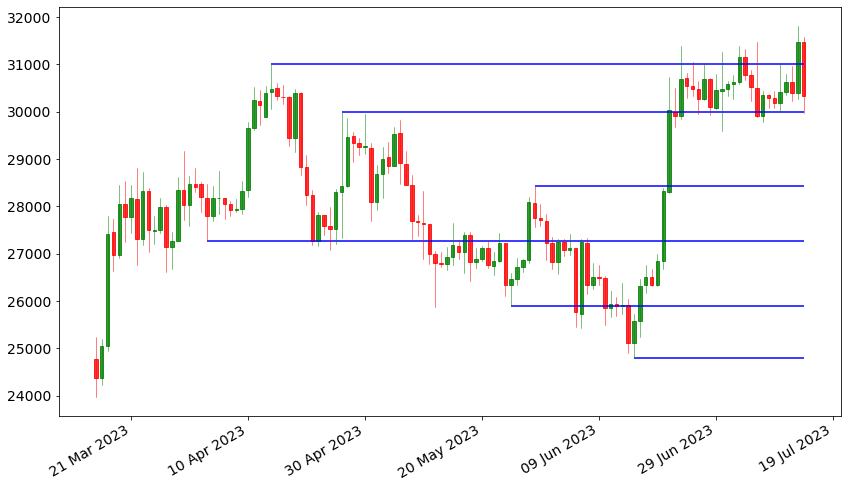

In [29]:
plot_all()